**Brain Tumor Classification using PyTorch CNN**

This project implements a Convolutional Neural Network (CNN) for brain tumor classification using PyTorch. The model uses the Brain Tumor Dataset from Kaggle to classify brain MRI images into 4 different categories of brain tumors.

**📋 Table of Contents**


1.   Overview
2.   Model Architecture
3.   Data Preprocessing
4.   Training Process
5.   Code Explanation
6.   Results Visualization

**🔍 Overview**

This deep learning model uses a CNN architecture to classify brain MRI scans into 4 different tumor types. The project utilizes the Brain Tumor Dataset from Kaggle, which contains MRI images categorized into different brain tumor types. The dataset is accessed through Google Drive integration in Google Colab, and the model includes data augmentation techniques to improve generalization.

 **Dataset Information:**

 1.  Source: Kaggle Brain Tumor Dataset
 2.  Access Method: Google Drive mounted in Google Colab
 3.  Image Type: Brain MRI scans
 4.  Classes: 4 different brain tumor categories
 5. Image Format: RGB images resized to 64x64 pixels



In [1]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
dataset_path = '/content/drive/MyDrive/Colab_Notebooks/Brain_Tumour'

In [4]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [6]:
# Determine the device to use
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cpu


**Model Architecture**

The CNN model consists of:

Convolutional Layers:

1. Conv2d(3, 32, 3, 1, 1) - First convolutional layer
2. Conv2d(32, 64, 3, 1, 1) - Second convolutional layer
3.  Conv2d(64, 128, 3, 1, 1) - Third convolutional layer

Pooling and Activation:

1. ReLU activation after each convolution
2. MaxPool2d(2) after each ReLU for downsampling
3. Dropout(0.5) for regularization

Fully Connected Layers:

1. Linear(12888, 256) - First FC layer (8192 → 256)
2. Linear(256, 4) - Output layer for 4 classes

In [7]:
model=nn.Sequential(
    nn.Conv2d(3,32,3,1,1),nn.ReLU(),nn.MaxPool2d(2),
    nn.Conv2d(32,64,3,1,1),nn.ReLU(),nn.MaxPool2d(2),
    nn.Conv2d(64,128,3,1,1),nn.ReLU(),nn.MaxPool2d(2),
    nn.Flatten(),
    nn.Linear(128*8*8,256),nn.ReLU(),nn.Dropout(0.5),
    nn.Linear(256,4),
).to(device)

In [8]:
opt=optim.AdamW(model.parameters(),1e-4)
loss_fn=nn.CrossEntropyLoss()


In [9]:
train_tf = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

test_tf = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

train_dl = DataLoader(
    datasets.ImageFolder('/content/drive/MyDrive/Colab_Notebooks/Brain_Tumour/Training', train_tf),
    batch_size=16,
    shuffle=True,
    num_workers=4,
    pin_memory=True
)

test_dl = DataLoader(
    datasets.ImageFolder('/content/drive/MyDrive/Colab_Notebooks/Brain_Tumour/Testing', test_tf),
    batch_size=16,
    shuffle=False,
    num_workers=4,
    pin_memory=True
)

**🎯 Training Process**

1. Optimizer: AdamW with learning rate 1e-4
2. Loss Function: CrossEntropyLoss
3. Batch Size: 16
5. Epochs: 25
6. Device: CUDA if available, otherwise CPU

**Training Loop:**

1. Forward pass through the model
2. Calculate loss using CrossEntropyLoss
3. Backpropagation
4. Parameter update using AdamW optimizer
5. Track running loss per epoch

In [10]:
model.train()
for epoch in range(25):
  running_loss = 0
  for x, y in train_dl:
    opt.zero_grad()
    x, y = x.to(device), y.to(device)
    pred = model(x)
    loss = loss_fn(pred, y)
    running_loss += loss
    loss.backward()
    opt.step()
  print(f'Epoch: {epoch+1}, Loss: {running_loss/len(train_dl)}')

Epoch: 1, Loss: 0.9959937930107117
Epoch: 2, Loss: 0.7217870950698853
Epoch: 3, Loss: 0.6260362267494202
Epoch: 4, Loss: 0.5746145844459534
Epoch: 5, Loss: 0.5297187566757202
Epoch: 6, Loss: 0.4912453889846802
Epoch: 7, Loss: 0.4571226239204407
Epoch: 8, Loss: 0.4300522208213806
Epoch: 9, Loss: 0.42524391412734985
Epoch: 10, Loss: 0.38967424631118774
Epoch: 11, Loss: 0.3643592894077301
Epoch: 12, Loss: 0.3497908115386963
Epoch: 13, Loss: 0.32805636525154114
Epoch: 14, Loss: 0.31474682688713074
Epoch: 15, Loss: 0.29749810695648193
Epoch: 16, Loss: 0.27614155411720276
Epoch: 17, Loss: 0.2657620310783386
Epoch: 18, Loss: 0.2627010643482208
Epoch: 19, Loss: 0.2491767853498459
Epoch: 20, Loss: 0.2258368581533432
Epoch: 21, Loss: 0.22293080389499664
Epoch: 22, Loss: 0.21066991984844208
Epoch: 23, Loss: 0.1978953629732132
Epoch: 24, Loss: 0.202418714761734
Epoch: 25, Loss: 0.18692319095134735


In [11]:
model.eval()
test_loss, correct = 0.0, 0
with torch.no_grad():
  for x, y in test_dl:
    x, y = x.to(device), y.to(device)
    logits = model(x)
    test_loss += loss_fn(logits, y).item() * y.size(0)
    preds = logits.argmax(dim=1)
    correct += (preds == y).sum().item()
test_loss /= len(test_dl.dataset)
accuracy = 100.0 * correct / len(test_dl.dataset)
print(f'Test Loss: {test_loss}, Accuracy: {accuracy}')

Test Loss: 0.23711849108724098, Accuracy: 90.77040427154844


**📥 Dataset Requirements**

1. Go to [Brain_Tumor_Dataset](https://https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset)
2. Download the dataset (requires Kaggle account)

**Upload to Google Drive:**

1. Extract the downloaded dataset
2. Upload to your Google Drive following the folder structure mentioned above
3. Ensure the path matches: /content/drive/MyDrive/Colab_Notebooks/Brain_Tumour/



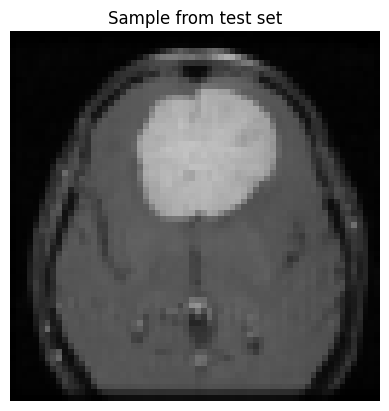

Predicted label: 1, Actual label: 1


In [12]:
import random
import matplotlib.pyplot as plt
from torchvision.transforms.functional import to_pil_image
model.eval()
idx=random.randrange(len(test_dl.dataset))
img, label=test_dl.dataset[idx]
unnorm=img*0.5+0.5
plt.imshow(to_pil_image(unnorm))
plt.axis('off')
plt.title('Sample from test set')
plt.show()

with torch.no_grad():
  logits=model(img.unsqueeze(0).to(device))
  pred=logits.argmax(dim=1).item()
  print(f'Predicted label: {pred}, Actual label: {label}')